# Gamma Ray Burst Lightcurves

This script is for the formation of lightcurves from observed portions of TESS. These cutout files are locations where a Gamma Ray Burst has been observed. A lightcurve is formed using the flux values given in the FITs file downloaded from TESScut. The values are normalized and represented as a 2-D line graph.

# Author(s)

Adam Dressel
Lindsey Carboneau

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
#function for opening fits file and getting header and pixel data
def read_fits_file(target_file):
    tess_file = fits.open(target_file)
    header_data = tess_file[0].header
    check_data = tess_file[1].data
    tess_file.close()
    # Converts flux values to an array.
    pixel_data = np.asarray(check_data)
    return (header_data, pixel_data, check_data)

input_file = '/home/adam/Documents/GammaRayFits/astrocut_7.763_-38.619_20x20px/tess-s0002-2-3_7.763000_-38.619000_20x20_astrocut.fits'

header, pixels, check = read_fits_file(input_file)

#THe flux values of the first frame.
frame_one = np.stack(pixels['FLUX'][162])

# Testing and Thought Process

The next few cells are used to observe and test exactly what data can be extracted and observed from the FITs file. This is useful for later in determining what values should be used in generating the lightcurve.

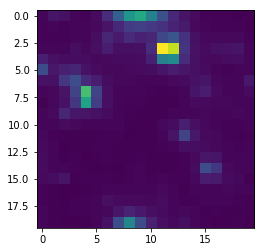

In [18]:
#Image of the flux values for the first frame
frame_image =  plt.imshow(frame_one)

In [6]:
mean = frame_one.mean()
print(mean)

100.31676


In [7]:
std = frame_one.std()
print(std)
print(mean + std)

16.98873
117.30549


In [8]:
                                            ''' 
        These are the 'pixels' where the flux is one standard deviation below the mean.
        The first index of the first array corresponds to the first index of the second array, 
        i.e. [1,1] is a pixel with a flux less than one std below the mean.
        These indices will be used to create the aperature mask for the mean_img.
                                            '''
    
np.where(frame_one < mean + std)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
        12, 

In [20]:
                                            '''
                Example showing how to iterate through frames of the pixel data. 
                Incrementing the second index of the pixels array will jump to the next frame.
                                            '''
    
frame_one = np.stack(pixels['FLUX'][162])

frame_two = np.stack(pixels['FLUX'][163])
print(pixels['TIME'][162])

1357.4946899414062


In [19]:
frame_one

array([[ 94.447044, 101.06738 ,  99.197205,  94.14639 ,  93.86669 ,
         96.85756 , 112.5352  , 141.0521  , 174.93695 , 188.21516 ,
        162.18106 , 131.58435 , 110.33618 , 100.74334 ,  96.85    ,
         93.86939 ,  93.678955,  93.34376 ,  92.60994 ,  92.87697 ],
       [ 93.58122 ,  94.97284 ,  93.81484 ,  93.9675  ,  94.78885 ,
         95.95815 , 100.22145 , 110.174835, 119.820496, 122.436165,
        118.22758 , 114.643524, 108.161736, 103.56835 ,  96.36515 ,
         94.46369 ,  93.677605,  93.49102 ,  93.91373 ,  92.58533 ],
       [ 93.825516,  93.74021 ,  93.88426 ,  94.29592 ,  94.64444 ,
         97.90746 , 109.36073 , 103.599075, 111.4475  , 106.50105 ,
        108.970535, 126.68131 , 134.20114 , 114.60559 ,  99.20141 ,
         95.755035,  95.24086 ,  95.28493 ,  95.36522 ,  93.6468  ],
       [ 94.79022 ,  94.97477 ,  94.31525 ,  97.8415  ,  95.39773 ,
         98.736946, 104.26896 ,  98.75394 ,  98.447334,  99.10954 ,
        112.135254, 251.4649  , 237.08757 , 1

In [3]:
# Top left pixel at frame one
print(frame_one[15][2])
# Top left pixel at frame two
print(frame_two[15][2])

101.34564


NameError: name 'frame_two' is not defined

# Background Subtraction

The next three cells are used to perform the background subtraction necessary to normalize the generated light curve.

In [23]:
#Loop for background subtraction of apeture mask.

#List of median values for faintest 20% of pixels. Each index value
#represents one frame.
median_list = []

# List of flux values for every frame, every pixel.
full_frame_list = np.stack(pixels['FLUX'])
# Gets lowest 20% pixels, gets the median of them for each frame and appends to median_list
for frame_num in full_frame_list:
    #List of pixels per frame
    temp_list = frame_num
    temp_list = np.reshape(temp_list, (400))
    temp_list.sort()
    median_list.append(np.median(temp_list[0:80]))

In [24]:
# This function takes a pixel at values x and y, and calculates the mean of the flux value for every frame.
def get_pixel_mean(x, y, pixel_arr):
    temp = []
    # Used to keep track of frame number for background subtraction
    median_frame_count = 0
    for frame in pixel_arr['FLUX']:
        pix_bkg_sub = frame[x][y] - median_list[median_frame_count]
        temp.append(pix_bkg_sub)
        median_frame_count+= 1
    return np.mean(temp)

In [25]:
full_img_avg = []
# Loop iterates through a range of 10 since image is 10x10. Change range for larger images.
for x in range(20):
    for y in range(20):
        #Appending the mean over time for this pixel to the full image mean
        full_img_avg.append(get_pixel_mean(x,y,pixels))

In [26]:
img_mean = np.asarray(full_img_avg)
img_mean.shape

(400,)

In [27]:
new_full_img = np.resize(img_mean,(20,20))
mean = new_full_img.mean()
std = new_full_img.std()
new_full_img

array([[ 1.41224563e+00,  7.65932941e+00,  5.41846848e+00,
         1.25984275e+00,  1.00823295e+00,  3.48261523e+00,
         1.91009445e+01,  4.67759552e+01,  7.91076965e+01,
         9.17288742e+01,  6.78839569e+01,  3.82502327e+01,
         1.71613464e+01,  7.54470539e+00,  3.89339781e+00,
         1.14067066e+00,  5.57093143e-01,  5.69822550e-01,
        -8.79608989e-02, -1.44030854e-01],
       [ 6.83392823e-01,  1.37511253e+00,  1.18224800e+00,
         7.25497842e-01,  1.94288480e+00,  3.17189670e+00,
         7.67400694e+00,  1.67349491e+01,  2.62091999e+01,
         2.85699425e+01,  2.47201252e+01,  2.13606586e+01,
         1.57646475e+01,  1.07747984e+01,  3.75828671e+00,
         1.28134668e+00,  7.37474144e-01,  6.68575644e-01,
         4.40763146e-01,  2.32092872e-01],
       [ 4.60540444e-01,  5.08037746e-01,  7.45052993e-01,
         1.41021299e+00,  2.29062772e+00,  5.07244062e+00,
         1.63648815e+01,  1.08610001e+01,  1.82388954e+01,
         1.29082689e+01,  1.6

In [4]:
plt.imshow(new_full_img)

NameError: name 'new_full_img' is not defined

# Outliers

This function is also used for the normalization process. It rejects outlying data by removing values more than 4 standard deviations above the mean of flux values.

In [5]:
def reject_outliers(data):
    # let's assume that `data` is a 1D array of the total flux within the mask in each frame
    
    # cond is value (flux) that is the threshold for "2 sigma"

    def quicklook(series):
        test = []
        for cadence in range(len(series)):
            # is the flux at that cadence more than 2std off of the mean --> data[cadence] > mean(data) + 2*std(data)
            if (np.abs(series[cadence]) < condition):
                test.append(series[cadence])
        return test
    prev = condition = np.mean(data) + 4 * np.std(data)
    while(True):
        temp = quicklook(data)
        
        condition = np.mean(temp) + 4 * np.std(temp)
        
        if (prev - condition < 10):
            break
        else: prev = condition
    
    result = temp
    
    #return data[abs(data - np.mean(data)) < m * np.std(data)]    return result

# Light curve Ensemble

This code is used for generating the ensemble of the lightcurve. These are 5 values in the data set that represent the average value for the entire mask. This is used to generate a proper data set to reject outliers.

In [7]:
# Code for lightcurve ensemble

#Holds median divided flux values
flux_vals = []
#Pixels used to create the ensemble, these are the four corners and the center pixel.
ensemble_box = [[0,0],[0,19],[19,19],[19,0],[10,10]]

for i in ensemble_box:
    #temp holds flux values for one pixel in the ensemble box.
    temp = []
    #Second loop goes through each cadence.
    for frame in range(len(full_frame_list)):
        cadence = full_frame_list[frame]
        temp.append(cadence[i[0]][i[1]])
    #Appends the median divided flux values for each pixel in box.
    flux_vals.append(temp/np.median(temp))
    
#Holds the median flux values for all 5 pixels in the ensemble - for each cadence.
img_flux_median = []
    
# Loops through all 1060 cadences
for cadence in range(len(flux_vals[0])):
    # Holds each pixels flux value at specific cadence.
    current_cad_flux = []
    #Nested loop changes pixel in the ensemble.
    for pixel in flux_vals:
        #Appends current pixel's flux at this cadence.
        current_cad_flux.append(pixel[cadence])
    #Finds the median of this cadence's flux value, appends to img_flux_median
    img_flux_median.append(np.median(current_cad_flux))


NameError: name 'full_frame_list' is not defined

# Target Pixel

This code requires the known location of the Gamma Ray Burst. Once that value is defined, a lightcurve is generated for the target pixel

In [37]:
#Code for creating target pixel light curve.
targ_pix = [15,2]
target_flux_vals = []

for frame in full_frame_list:
    target_flux_vals.append(frame[targ_pix[0]][targ_pix[1]])

lc_corr = np.divide(target_flux_vals, img_flux_median)
lc_corr = np.divide(lc_corr, np.median(lc_corr))
new_targ_flux = lc_corr * np.median(target_flux_vals)

In [6]:
new_lc = plt.plot(pixels['TIME'],new_targ_flux)

NameError: name 'new_targ_flux' is not defined

In [17]:
#Code determines which pixels should be in the mask.
wanted_pixels = np.where(new_full_img < mean + std)
len(wanted_pixels[0])

92

In [18]:
x_vals = []
y_vals = []
# Gets indexes from wanted pixels, and appends them to an x and y list.
for arr_ind in range(2):
    for pixel_ind in range(92):
        if arr_ind == 0:
            x_vals.append(wanted_pixels[arr_ind][pixel_ind])
        else:
            y_vals.append(wanted_pixels[arr_ind][pixel_ind])

In [19]:
# Creates a list of x,y pairs. 
index_list = []
for index in range(92):
    index_list.append([x_vals[index],y_vals[index]])

In [20]:
index_list

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [5, 0],
 [5, 1],
 [5, 3],
 [5, 4],
 [5, 5],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [6, 0],
 [6, 4],
 [6, 5],
 [6, 6],
 [6, 7],
 [6, 8],
 [6, 9],
 [7, 0],
 [7, 3],
 [7, 4],
 [7, 5],
 [7, 6],
 [7, 7],
 [7, 8],
 [7, 9],
 [8, 0],
 [8, 1],
 [8, 2],
 [8, 3],
 [8, 4],
 [8, 5],
 [8, 6],
 [8, 7],
 [8, 8],
 [8, 9],
 [9, 0],
 [9, 1],
 [9, 2],
 [9, 3],
 [9, 6],
 [9, 7],
 [9, 8],
 [9, 9]]